In [1]:
import pandas as pd
import numpy as np
import json
import nltk
import re
import csv
import matplotlib.pyplot as plt 
import seaborn as sns
import xlrd
from tqdm import tqdm
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split

%matplotlib inline
pd.set_option('display.max_colwidth', 300)

In [2]:
# OUR DATA SET
# Pandas is used to import one version of our dataset

#meta = pd.read_excel("Project/CleanData.xlsx", header = 0)
meta = pd.read_excel("Project/OurData/Data_Full.xlsx", header = 0)
#meta = pd.read_excel("Project/OurData/Data_Medium.xlsx", header = 0)
#meta = pd.read_excel("Project/OurData/Data_Smallest.xlsx", header = 0)
meta.head()

,imdb_title_id,title,original_title,year,date_published,genre,duration,country,language,director,...,actors,description,avg_vote,votes,budget,usa_gross_income,worlwide_gross_income,metascore,reviews_from_users,reviews_from_critics
0,tt0099397,Defenseless,Defenseless,1991,1991-08-23 00:00:00,"Mystery, Thriller",104,USA,English,Martin Campbell,...,"Barbara Hershey, Sam Shepard, Mary Beth Hurt, J.T. Walsh, Kellie Overbey, Jay O. Sanders, John Kapelos, Sheree North, Randy Brooks, Christopher M. Brown, Michael Collins, George P. Wilbur, Marabina Jaimes, John Achorn, Lisa Darr",A lawyer is hired to defend an old college friend accused of murdering her husband.,5.7,630,NaN,6413375,6413375.0,NaN,9.0,7.0
1,tt0099399,Delta Force 2: The Colombian Connection,Delta Force 2: The Colombian Connection,1990,1990-08-24 00:00:00,"Action, Adventure, Crime",111,USA,"English, Spanish",Aaron Norris,...,"Chuck Norris, Billy Drago, John P. Ryan, Richard Jaeckel, Begonya Plaza, Paul Perri, HÃ©ctor Mercado, Mark Margolis, Mateo GÃ³mez, Ruth de Sosa, Gerald Castillo, Geoff Brewer, Rick Prieto, Sharlene Ross, Michael Heit","When DEA agents are taken captive by a ruthless South American kingpin, the Delta Force is reunited to rescue them in this sequel to the 1986 film.",4.8,6295,NaN,6698361,6698361.0,NaN,53.0,36.0
2,tt0099401,Demon Wind,Demon Wind,1990,1990-07-05 00:00:00,Horror,96,USA,English,Charles Philip Moore,...,"Eric Larson, Francine LapensÃ©e, Rufus Norris, Jack Vogel, Stephen Quadros, Mark David Fritsche, Sherry Leigh, Bobby Johnston, Lynn Clark, Richard Gabai, Mia M. Ruiz, Kym Santelle, Stella Kastner, Axel Toowey, Jake Jacobson","With the need to investigate the mysterious death of his grandparents, Cory and his friends assemble back to the old farm where it all began, sixty years earlier.",5.0,1852,NaN,NaN,NaN,NaN,45.0,32.0
3,tt0099409,Desperate Hours,Desperate Hours,1990,1990-10-05 00:00:00,"Action, Crime, Drama",105,USA,English,Michael Cimino,...,"Mickey Rourke, Anthony Hopkins, Mimi Rogers, Lindsay Crouse, Kelly Lynch, Elias Koteas, David Morse, Shawnee Smith, Danny Gerard, Gerry Bamman, Matt McGrath, John Christopher Jones, Dean Norris, John Finn, Christopher Curry","An escaped con, on the run from the law, moves into a married couple's house and takes over their lives.",5.4,6499,18000000,2742912,2742912.0,NaN,57.0,39.0
4,tt0099422,Dick Tracy,Dick Tracy,1990,1990-07-06 00:00:00,"Action, Comedy, Crime",105,USA,English,Warren Beatty,...,"Warren Beatty, Charlie Korsmo, Michael Donovan O'Donnell, Jim Wilkey, Stig Eldred, Neil Summers, Chuck Hicks, Lawrence Steven Meyers, William Forsythe, Ed O'Ross, Glenne Headly, Marvellee Cariaga, Michael Gallup, Seymour Cassel, James Keane",The comic strip detective finds his life vastly complicated when Breathless Mahoney makes advances towards him while he is trying to battle Big Boy Caprice's united mob.,6.1,54388,47000000,103738726,162738726.0,NaN,180.0,94.0


In [3]:
# OUR DATA SET
# We take out the parts of the dataset that are important for the descritpion classification and transform
# it into a dataframe for easier access.

movies = pd.DataFrame(meta[['imdb_title_id', 'title', 'genre', 'description']])

movies.head()

,imdb_title_id,title,genre,description
0,tt0099397,Defenseless,"Mystery, Thriller",A lawyer is hired to defend an old college friend accused of murdering her husband.
1,tt0099399,Delta Force 2: The Colombian Connection,"Action, Adventure, Crime","When DEA agents are taken captive by a ruthless South American kingpin, the Delta Force is reunited to rescue them in this sequel to the 1986 film."
2,tt0099401,Demon Wind,Horror,"With the need to investigate the mysterious death of his grandparents, Cory and his friends assemble back to the old farm where it all began, sixty years earlier."
3,tt0099409,Desperate Hours,"Action, Crime, Drama","An escaped con, on the run from the law, moves into a married couple's house and takes over their lives."
4,tt0099422,Dick Tracy,"Action, Comedy, Crime",The comic strip detective finds his life vastly complicated when Breathless Mahoney makes advances towards him while he is trying to battle Big Boy Caprice's united mob.


In [4]:
# OUR DATA SET
genres = []

# Perform cleanup on the genre tags and create a python list from the comma seperated list
for i in movies['genre']:
    genres.append(i.replace(" ", "").split(','))
    
# add to 'movies' dataframe  
movies['genre_new'] = genres

# remove samples with 0 genre tags
movies_new = movies[~(movies['genre_new'].str.len() == 0)]

# Show the different shapes to illustrate how many samples with 0 genre tags were removed
movies_new.shape, movies.shape

((20157, 5), (20157, 5))

In [5]:
# Count how many unique genres are present in the dataset
all_genres = sum(genres,[])
len(set(all_genres))

21

In [6]:
# Here we use NLTK to count the frequency distribution of the genre tags over the entire dataset
all_genres = nltk.FreqDist(all_genres) 

# Transform the frequeny distribution into a dataframe for easier access
all_genres_df = pd.DataFrame({'Genre': list(all_genres.keys()), 
                              'Count': list(all_genres.values())})

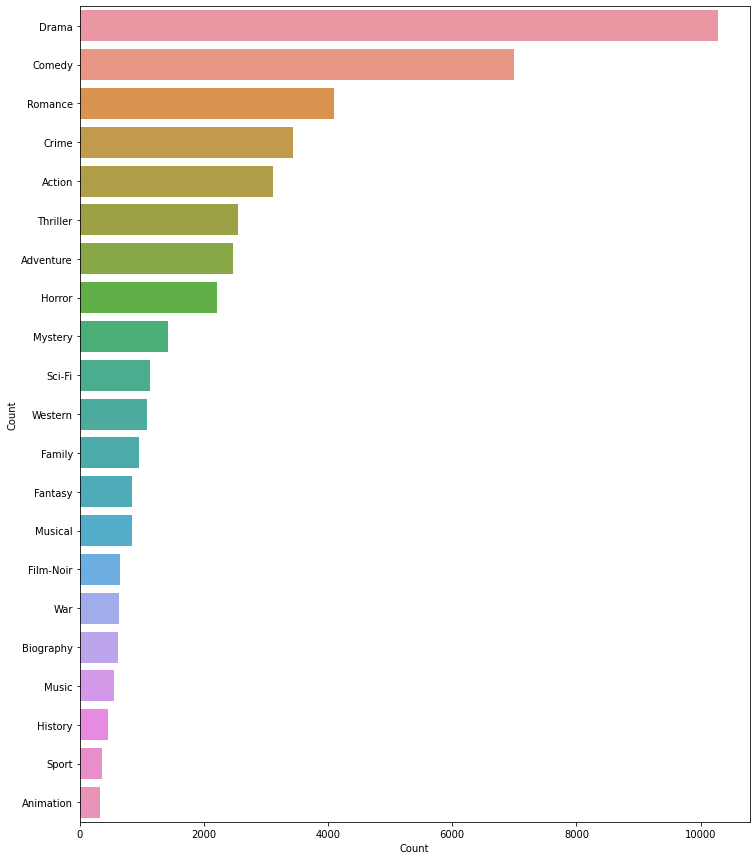

In [7]:
# We use MatPlotLib to transform the frequency distribution dataframe into a bar chart

g = all_genres_df.nlargest(columns="Count", n = 50) 
plt.figure(figsize=(12,15)) 
ax = sns.barplot(data=g, x= "Count", y = "Genre") 
ax.set(ylabel = 'Count') 
plt.show()

In [8]:
# This function is created to clean up the description texts.

def clean_text(text):
    text = str(text)
    # remove backslash-apostrophe 
    text = re.sub("\'", "", text) 
    # remove everything except alphabets 
    text = re.sub("[^a-zA-Z]"," ",text) 
    # remove whitespaces 
    text = ' '.join(text.split()) 
    # convert text to lowercase 
    text = text.lower() 
    
    return text

In [9]:
# Run the clean_text function defined above on every single movie description in the dataset
movies_new['clean_plot'] = movies_new['description'].apply(lambda x: clean_text(x))

In [10]:
# Show a preview of the dataset after cleaning up the movie descriptions
movies_new.head()

,imdb_title_id,title,genre,description,genre_new,clean_plot
0,tt0099397,Defenseless,"Mystery, Thriller",A lawyer is hired to defend an old college friend accused of murdering her husband.,"[Mystery, Thriller]",a lawyer is hired to defend an old college friend accused of murdering her husband
1,tt0099399,Delta Force 2: The Colombian Connection,"Action, Adventure, Crime","When DEA agents are taken captive by a ruthless South American kingpin, the Delta Force is reunited to rescue them in this sequel to the 1986 film.","[Action, Adventure, Crime]",when dea agents are taken captive by a ruthless south american kingpin the delta force is reunited to rescue them in this sequel to the film
2,tt0099401,Demon Wind,Horror,"With the need to investigate the mysterious death of his grandparents, Cory and his friends assemble back to the old farm where it all began, sixty years earlier.",[Horror],with the need to investigate the mysterious death of his grandparents cory and his friends assemble back to the old farm where it all began sixty years earlier
3,tt0099409,Desperate Hours,"Action, Crime, Drama","An escaped con, on the run from the law, moves into a married couple's house and takes over their lives.","[Action, Crime, Drama]",an escaped con on the run from the law moves into a married couples house and takes over their lives
4,tt0099422,Dick Tracy,"Action, Comedy, Crime",The comic strip detective finds his life vastly complicated when Breathless Mahoney makes advances towards him while he is trying to battle Big Boy Caprice's united mob.,"[Action, Comedy, Crime]",the comic strip detective finds his life vastly complicated when breathless mahoney makes advances towards him while he is trying to battle big boy caprices united mob


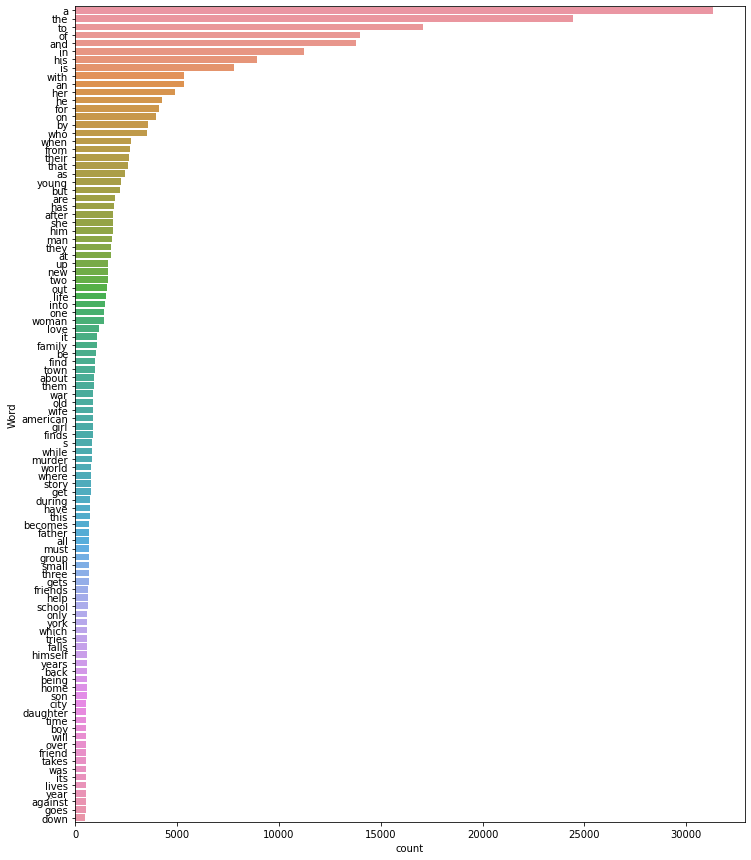

In [11]:
# This function takes a column from the dataset and counts how many times each term is present.
# It then shows the top 'terms' most common words
def freq_words(x, terms = 30): 
  all_words = ' '.join([text for text in x]) 
  all_words = all_words.split() 
  fdist = nltk.FreqDist(all_words) 
  words_df = pd.DataFrame({'word':list(fdist.keys()), 'count':list(fdist.values())}) 
  
  # selecting top 'terms' most frequent words 
  d = words_df.nlargest(columns="count", n = terms) 
  
  # visualize words and frequencies
  plt.figure(figsize=(12,15)) 
  ax = sns.barplot(data=d, x= "count", y = "word") 
  ax.set(ylabel = 'Word') 
  plt.show()
  
# Use the above function to print the top 100 words in the 'clean_plot' column
freq_words(movies_new['clean_plot'], 100)

In [12]:
# Download the latest version of the stopwords list from NLTK
nltk.download('stopwords')

# Import the stopwords object that holds the list of stopwords
from nltk.corpus import stopwords
stop_words = set(stopwords.words('english'))

# Print the list of stopwords
print(stop_words)

# function to remove stopwords
def remove_stopwords(text):
    no_stopword_text = [w for w in text.split() if not w in stop_words]
    return ' '.join(no_stopword_text)

# Use the above function to remove all stopwords from the 'clean_plot' column in the dataset
movies_new['clean_plot'] = movies_new['clean_plot'].apply(lambda x: remove_stopwords(x))

{'him', 'to', 'now', 'once', 'itself', 'over', 'you', 'so', 'couldn', 'didn', 'doesn', 'of', 'all', "doesn't", 'myself', 'if', "couldn't", 'a', 'aren', 'our', 'can', 'those', 'ourselves', 'having', 'which', 'further', 'there', 'few', 'ain', 'before', 'down', 'been', 'out', 'whom', 'are', 'hers', 's', 'yourself', 'up', 'its', "should've", 'we', 'after', 'should', 'for', 'too', 'into', 'than', "you've", 'here', 'their', 'own', 'doing', 'his', 'the', 'shouldn', 'who', "mustn't", 'o', 'or', 'where', "shan't", "haven't", 'in', "she's", "hadn't", 'then', 'herself', 'shan', 'very', 'it', 'above', 'some', 'what', "that'll", 'each', "didn't", "needn't", 'just', 'these', 'am', 'during', "you'll", 'ma', 'does', 'by', 'from', 'any', "wouldn't", 'because', 'do', 'himself', 'them', 'but', 'that', 'nor', 'have', "mightn't", 'ours', 'and', 'weren', 'other', 'haven', 'was', 'below', 'yourselves', 'off', 'mightn', 'he', 'me', 'wasn', 'has', 'did', "it's", 'at', 'isn', 'm', 'i', 'not', "weren't", 'under'

[nltk_data] Downloading package stopwords to /home/jknol/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


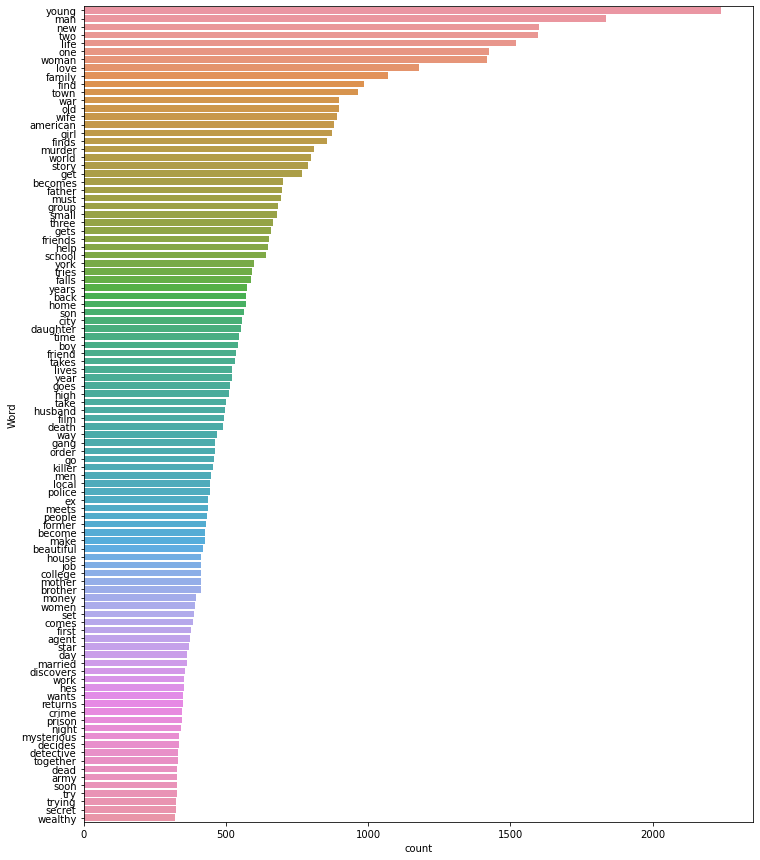

In [13]:
# Show the frequency distribution in the 'clean_plot' column again. This time after stopwords removal
freq_words(movies_new['clean_plot'], 100)

In [14]:
# Create a MultilabelBinarizer that will hold the binary values for the genre predictions outcomes
from sklearn.preprocessing import MultiLabelBinarizer

multilabel_binarizer = MultiLabelBinarizer()
multilabel_binarizer.fit(movies_new['genre_new'])

# transform target variable
y = multilabel_binarizer.transform(movies_new['genre_new'])

In [15]:
# Create the tfidfVectorizer to inversely offset the amount of times a term occurs in a single
# description against the amount of times that word occurs in any description.
tfidf_vectorizer = TfidfVectorizer(max_df=0.8, max_features=10000)

# split dataset into training and validation set
xtrain, xval, ytrain, yval = train_test_split(movies_new['clean_plot'], y, test_size=0.2, random_state=9)

# create TF-IDF features
xtrain_tfidf = tfidf_vectorizer.fit_transform(xtrain)
xval_tfidf = tfidf_vectorizer.transform(xval)

In [16]:
from sklearn.linear_model import LogisticRegression

# Binary Relevance
from sklearn.multiclass import OneVsRestClassifier

# Performance metric
from sklearn.metrics import f1_score, accuracy_score, recall_score, precision_score, precision_recall_fscore_support

In [17]:
lr = LogisticRegression()
clf = OneVsRestClassifier(lr)

# fit model on train data
clf.fit(xtrain_tfidf, ytrain)

OneVsRestClassifier(estimator=LogisticRegression(C=1.0, class_weight=None,
                                                 dual=False, fit_intercept=True,
                                                 intercept_scaling=1,
                                                 l1_ratio=None, max_iter=100,
                                                 multi_class='auto',
                                                 n_jobs=None, penalty='l2',
                                                 random_state=None,
                                                 solver='lbfgs', tol=0.0001,
                                                 verbose=0, warm_start=False),
                    n_jobs=None)

In [18]:
# make predictions for validation set
y_pred = clf.predict(xval_tfidf)

In [19]:
# evaluate performance
print(f1_score(yval, y_pred, average="micro"))

0.4197048949957062


In [20]:
# predict probabilities (with standard threshold value of 0.5)
y_pred_prob = clf.predict_proba(xval_tfidf)

In [21]:
# Predict probabilities with a different threshold value
t = 0.3 # threshold value (hyperparameter)
y_pred_new = (y_pred_prob >= t).astype(int)

In [22]:
# evaluate performance
print(f1_score(yval, y_pred_new, average="micro"))

0.544570873120247


In [23]:
# Cross validate multiple threshold values and print performance parameters
t_values = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8]
best_t = 0
best_score = 0
for t_val in t_values:
    y_pred_new = (y_pred_prob >= t_val).astype(int)
    score = f1_score(y_true=yval, y_pred=y_pred_new, average="micro")
    accuracy = accuracy_score(yval, y_pred_new, normalize=True)
    precision = precision_score(yval, y_pred_new, average="micro")
    recall = recall_score(yval, y_pred_new, average="micro")
    print("{} gave an f1-score of {}, an accuracy of {}, a precision of {}, and a recall of {}".format(t_val, score, accuracy, precision, recall))
    if score > best_score:
        best_t = t_val
        best_score = score
print("{} was the best score, achieved with a threshold of {}".format(best_score, best_t))

0.1 gave an f1-score of 0.47327373026440933, an accuracy of 0.008680555555555556, a precision of 0.33052873970418917, and a recall of 0.8330357142857143
0.2 gave an f1-score of 0.5490468258374976, an accuracy of 0.06001984126984127, a precision of 0.4689377173569396, and a recall of 0.6621651785714285
0.3 gave an f1-score of 0.544570873120247, an accuracy of 0.10590277777777778, a precision of 0.5583304021573455, and a recall of 0.5314732142857143
0.4 gave an f1-score of 0.49895601805078454, an accuracy of 0.125, a precision of 0.6291829454730763, and a recall of 0.4133928571428571
0.5 gave an f1-score of 0.4197048949957062, an accuracy of 0.11755952380952381, a precision of 0.6983632112236945, and a recall of 0.3
0.6 gave an f1-score of 0.31058990760483296, an accuracy of 0.08308531746031746, a precision of 0.7613240418118467, and a recall of 0.19508928571428572
0.7 gave an f1-score of 0.1863550846618477, an accuracy of 0.051835317460317464, a precision of 0.8261633011413521, and a re

In [24]:
# Function that takes a string value and returns a list of genre predictions based on the given text
def infer_tags(q):
    q = clean_text(q)
    q = remove_stopwords(q)
    q_vec = tfidf_vectorizer.transform([q])
    q_pred = clf.predict(q_vec)
    return multilabel_binarizer.inverse_transform(q_pred)

In [25]:
movies_new.head()

,imdb_title_id,title,genre,description,genre_new,clean_plot
0,tt0099397,Defenseless,"Mystery, Thriller",A lawyer is hired to defend an old college friend accused of murdering her husband.,"[Mystery, Thriller]",lawyer hired defend old college friend accused murdering husband
1,tt0099399,Delta Force 2: The Colombian Connection,"Action, Adventure, Crime","When DEA agents are taken captive by a ruthless South American kingpin, the Delta Force is reunited to rescue them in this sequel to the 1986 film.","[Action, Adventure, Crime]",dea agents taken captive ruthless south american kingpin delta force reunited rescue sequel film
2,tt0099401,Demon Wind,Horror,"With the need to investigate the mysterious death of his grandparents, Cory and his friends assemble back to the old farm where it all began, sixty years earlier.",[Horror],need investigate mysterious death grandparents cory friends assemble back old farm began sixty years earlier
3,tt0099409,Desperate Hours,"Action, Crime, Drama","An escaped con, on the run from the law, moves into a married couple's house and takes over their lives.","[Action, Crime, Drama]",escaped con run law moves married couples house takes lives
4,tt0099422,Dick Tracy,"Action, Comedy, Crime",The comic strip detective finds his life vastly complicated when Breathless Mahoney makes advances towards him while he is trying to battle Big Boy Caprice's united mob.,"[Action, Comedy, Crime]",comic strip detective finds life vastly complicated breathless mahoney makes advances towards trying battle big boy caprices united mob


In [26]:
# Use the above 'infer_tags' function to output the prediction for 5 random movies in the validation set
for i in range(5): 
  k = xval.sample(1).index[0] 
  print("Movie: ", movies_new['title'][k], "\nPredicted genre: ", infer_tags(xval[k])), print("Actual genre: ",movies_new['genre_new'][k], "\n")

Movie:  Ellie Parker 
Predicted genre:  [('Comedy', 'Drama')]
Actual genre:  ['Comedy', 'Drama'] 

Movie:  West Point of the Air 
Predicted genre:  [('Drama',)]
Actual genre:  ['Drama'] 

Movie:  Day of the Woman 
Predicted genre:  [()]
Actual genre:  ['Horror', 'Thriller'] 

Movie:  Sleuth 
Predicted genre:  [('Comedy', 'Drama')]
Actual genre:  ['Crime', 'Drama', 'Mystery'] 

Movie:  Back by Midnight 
Predicted genre:  [('Crime', 'Drama')]
Actual genre:  ['Comedy'] 



In [27]:
tags = {list(all_genres.keys())[i]: i for i in range(len(list(all_genres.keys())))}
t_values = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8]

# Calculate the performance of the model in terms of F1-score, flat accuracy, positive accuracy and perfect matches
# These metrics are used in the other parts of our project.
# This loop prints out the performance metrices across different values for t(hreshold).
for t_val in t_values:
    print("Now trying t_val={}".format(t_val))
    y_pred_new = (y_pred_prob >= t_val).astype(int)

    # do a comparison
    predictions = []
    for i in y_pred_new:
        predictions.append(i.tolist())

    true_labels = []
    for i in yval:
        true_labels.append(i.astype(int).flatten().tolist())

    accuracy = 0
    positive_accuracy = 0
    perfect_matches = 0
    num_samples = len(true_labels)
    for i in range(num_samples):
        if true_labels[i] == predictions[i]:
            accuracy += 1
            positive_accuracy += 1
            perfect_matches += 1
        else:
            # positive accuracy
            # num correct over max(num_guessed, num_true)
            positive_accuracy += np.sum(2*np.array(true_labels[i])-1==np.array(predictions[i])) / max(np.sum(true_labels[i]), sum(predictions[i]))

            # flat accuracy
            accuracy += np.sum(np.array(true_labels[i])==np.array(predictions[i])) / len(true_labels[i])

    preds = np.array(predictions)
    true_labels = np.array(true_labels)

    print("Size of test set:", len(true_labels))
    print("Perfect matches: {}".format(perfect_matches))
    print("Positive accuracy:", positive_accuracy/num_samples)
    print("Flat accuracy:", accuracy/num_samples)
    print("F1-Score: {}".format(f1_score(y_true=yval, y_pred=y_pred_new, average="micro")))

    stats = precision_recall_fscore_support(y_pred=preds, y_true=true_labels, average=None, labels=range(len(tags)))
    stats = np.array(stats)

    #for t in tags:
    #    print(tags[t], t, stats[:, tags[t]])
        
    print("=============================================================================")


Now trying t_val=0.1
Size of test set: 4032
Perfect matches: 35
Positive accuracy: 0.34722665107709805
Flat accuracy: 0.803784013605432
F1-Score: 0.47327373026440933
Now trying t_val=0.2
Size of test set: 4032
Perfect matches: 242
Positive accuracy: 0.46292635109599234
Flat accuracy: 0.8848970143612755
F1-Score: 0.5490468258374976
Now trying t_val=0.3
Size of test set: 4032
Perfect matches: 427
Positive accuracy: 0.46262400793650504
Flat accuracy: 0.9059311224489498
F1-Score: 0.544570873120247


/home/jknol/.conda/envs/JamesNLP/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Now trying t_val=0.4
Size of test set: 4032
Perfect matches: 504
Positive accuracy: 0.40670469576719287
Flat accuracy: 0.912143329554014
F1-Score: 0.49895601805078454
Now trying t_val=0.5
Size of test set: 4032
Perfect matches: 474
Positive accuracy: 0.32049851190476136
Flat accuracy: 0.9122141912320179
F1-Score: 0.4197048949957062
Now trying t_val=0.6
Size of test set: 4032
Perfect matches: 335
Positive accuracy: 0.21775793650793815
Flat accuracy: 0.9083522297807647
F1-Score: 0.31058990760483296
Now trying t_val=0.7
Size of test set: 4032
Perfect matches: 209
Positive accuracy: 0.12148644179894111
Flat accuracy: 0.9029549319727492
F1-Score: 0.1863550846618477
Now trying t_val=0.8
Size of test set: 4032
Perfect matches: 86
Positive accuracy: 0.04856977513227521
Flat accuracy: 0.8978883219954205
F1-Score: 0.07707087959009394


In [28]:
# A test output that shows the usage of the 'infer_tags' function on a randomly chosen description from the IMDb website.
infer_tags("Following the events of Avengers: Endgame (2019), Spider-Man must step up to take on new threats in a world that has changed forever.")

[('Drama',)]